# **The discovery of Benford’s law**
Have you ever noticed what chance has a given number to start with the digit 1?Does the digit 1 has the same propability to be a leading digit as 9? To let you know that the leading numbers of a number represents its non zero left most digits. For example 29 and 0.037 are 2 and 3.Well the unswer in the previous question is no. According to Benford’s law, a.k.a. the first digit law, the frequency of occurrence of the leading digits in naturally occurring numerical distributions is predictable and nonuniform but more close to a power law distribution. In fact, a given number is six times more likely to start with a 1 than a 9! This is very illogical, as most people would expect a uniform distribution U(1,9) where all the digits have the same likelihood to show up in first slot so they expext a probability of 1/9 percent ~ 11,1%.

In 1881 Newcomb noticed that the pages in the front, used for numbers beginning with the lowest digits, were more worn than those in the back’s and that’s why the leading digits were much more likely to be small than large. Then, in 1938, physicist Frank Benford rediscovered the theorem of Newcomb by collecting over 20,000 samples of realworld numbers, using data sources as distinc as the measurements of rivers, street addresses, numbers contained in Reader’s Digest magazine, molecular weights, baseball statistics, death rates, and more. And because that he popularized this scientific discovery, he got all the credit.

# **Benford's Law**
Benford's Law is an observation about the distribution of the frequencies of the first digits of the numbers in many different data sets. It is frequently found that the first digits are not uniformly distributed, but follow the logarithmic distribution:

$P(d) = Log_{10} (\frac{d+1}{d})$

That is, numbers starting with 1 are more common than those starting with 2, and so on, with those starting with 9 the least common. The probabilities are given below:

</br>
<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/benfords_law_1.jpg" width="170" height="220" align="center" hspace="180"/>
<br>



Benfords law can be applied to many situations and is particularly useful in fraud detection
I have downloaded the 2016 US election results for Illinois  from [here](https://drive.google.com/file/d/1zIibehCLKvdTPybzFENW9JukLti2yV1M/view). However, I have edited the file to calcualte the votes from the total votes multiplied by the percentages. In this analysis we are going to examine the Republican votes for Illinois and this can be seen in the following code.

In [ ]:

import pandas as pd

df = pd.read_csv('/content/illinois_vote_2016.csv',encoding = "utf-8")
print(df.head())

                       County  Precincts   Votes  Democrats 08 (Votes)  \
0     Grundy County, Illinois         40   22891                 11063   
1     Shelby County, Illinois         33   10912                  4245   
2     Saline County, Illinois         28   11234                  5083   
3  Winnebago County, Illinois        197  113027                 70034   
4     DuPage County, Illinois        869  412929                228698   

   Democrats 12 (Votes)  Republicans 08 (Votes)  Republicans 12 (Votes)  \
0                  9451                   10687                   11343   
1                  3342                    6396                    6843   
2                  3701                    6099                    6806   
3                 61732                   53886                   55138   
4                199460                  183626                  195046   

   Republicans 2016  Democrats 2016  Rep_votes  Dem_Votes  
0         58.612555       35.039972      134

We are going to import the relevant libaries.

In [ ]:
import numpy as np
import pandas as pd
import sys
import math
import matplotlib.pyplot as plt

In this piece of code(Towards Science) we count the first digit.

In [ ]:
def count_first_digit(data_str):
    print(data_str)
    mask=df[data_str]>1.
    data=list(df[mask][data_str])
    for i in range(len(data)):
        while data[i]>10:
            data[i]=data[i]/10
    first_digits=[int(x) for x in sorted(data)]
    unique=(set(first_digits))#a list with unique values of     first_digit list
    data_count=[]
    for i in unique:
        count=first_digits.count(i)
        data_count.append(count)
    total_count=sum(data_count)
    data_percentage=[(i/total_count)*100 for i in data_count]
    return  total_count,data_count, data_percentage
# Benford's Law percentages for leading digits 1-9
BENFORD = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

total_count,data_count, data_percentage=count_first_digit('Dem_Votes')


print(data_count)

Dem_Votes
[36, 15, 11, 11, 8, 5, 5, 7, 4]


Now we implement a $\chi^2$ test to determine if there is a significant difference between the actual results and the expected results. We also plot the expected against the actual counts in a bar chart.

Actual counts  [36, 15, 11, 11, 8, 5, 5, 7, 4]
Expected counts  [31, 18, 13, 10, 8, 7, 6, 5, 5]

Chi-squared Test Statistic = 3.452
Critical value at a P-value of 0.05 is 15.51.


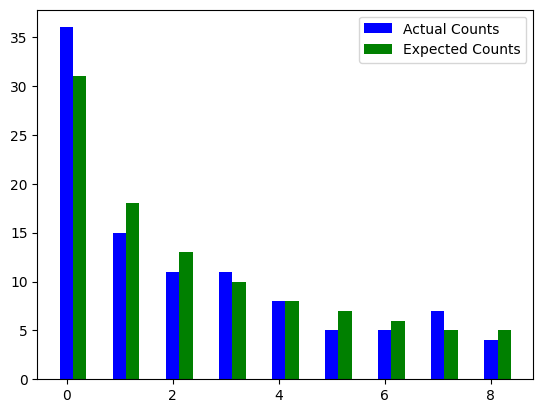

3.452239158690772
pvalue is:  0.06316614217093064


In [ ]:
def get_expected_counts(total_count):
    """Return list of expected Benford's Law counts for total sample count."""
    return [round(p * total_count / 100) for p in BENFORD]
expected_counts=get_expected_counts(total_count)
def chi_square_test(data_count,expected_counts):
    """Return boolean on chi-square test (8 degrees of freedom & P-val=0.05)."""
    chi_square_stat = 0  # chi square test statistic
    for data, expected in zip(data_count,expected_counts):

        chi_square = math.pow(data - expected, 2)

        chi_square_stat += chi_square / expected
    print("Actual counts ", data_count)
    print("Expected counts ", expected_counts)
    print("\nChi-squared Test Statistic = {:.3f}".format(chi_square_stat))
    print("Critical value at a P-value of 0.05 is 15.51.")
    X = np.arange(9)
    category=['Actual Counts','Expected Counts']
    plt.bar(X + 0.00, data_count, color = 'b', width = 0.25)
    plt.bar(X + 0.25, expected_counts, color = 'g', width = 0.25)
    plt.legend(category,loc=1)
    plt.show()
    return chi_square_stat
chi=chi_square_test(data_count,expected_counts)
print(chi)
from scipy import stats
print("pvalue is: ",1-stats.chi2.cdf(chi, 1))

What do these results tell us. Well the fact that we got a False result implies we cannot accept the null hypothesis. This tells us that there may be evidence that there was unusual behavour in the elections(this differs to the results found by Towards Science). I will say that it is only marginally significant and this could be down to the fact that we have only used 103 counties in the analysis, as we are at the low end of what is expected for a Benford analysis.  



Complete this analysis for the full US generall election. Talk amongst yourselves and see if you think the election results seem to be fair.

---

